# Import libraries

In [1]:
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Data Exploration

In [2]:
# Read student data
data = pd.read_csv("data.csv")

/home/user/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [74]:
data.tail()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,gender,corona_result
278843,2020-03-11,0,0,0,0,0,2,0
278844,2020-03-11,0,0,0,0,0,2,0
278845,2020-03-11,0,0,0,0,0,2,1
278846,2020-03-11,0,0,0,0,0,2,1
278847,2020-03-11,0,0,0,0,0,2,0


# Data Preprocessing with Visualization

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  object
 2   fever                278848 non-null  object
 3   sore_throat          278848 non-null  object
 4   shortness_of_breath  278848 non-null  object
 5   head_ache            278848 non-null  object
 6   corona_result        278848 non-null  object
 7   gender               278848 non-null  object
dtypes: object(8)
memory usage: 17.0+ MB


In [5]:
data = data.drop(['age_60_and_above'], axis = 1)
data = data.drop(['test_indication'], axis = 1)

In [13]:
data = data.replace({'cough': {'None': 1,'1':1,'0':0}})

<AxesSubplot:xlabel='cough', ylabel='count'>

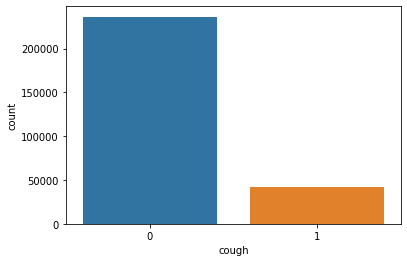

In [14]:
import seaborn as sns
sns.countplot(x="cough", data = data)

In [11]:
data = data.replace({'fever': {'None': 1,'1':1,'0':0}})

<AxesSubplot:xlabel='fever', ylabel='count'>

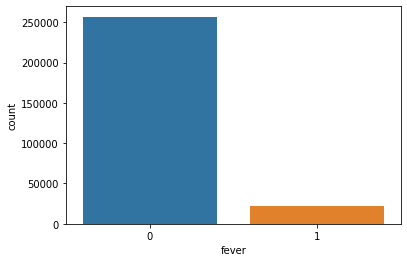

In [12]:
import seaborn as sns
sns.countplot(x="fever", data = data)

In [16]:
data = data.replace({'sore_throat': {'None': 1,'1':1,'0':0}})

<AxesSubplot:xlabel='sore_throat', ylabel='count'>

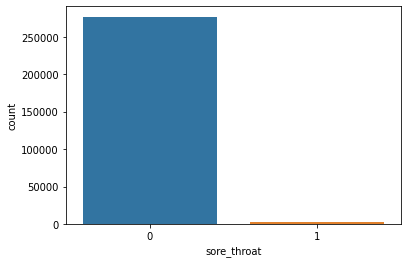

In [17]:
import seaborn as sns
sns.countplot(x="sore_throat", data = data)

<AxesSubplot:xlabel='corona_result', ylabel='count'>

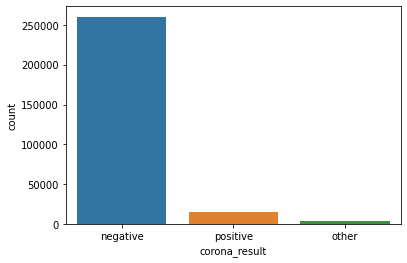

In [18]:
import seaborn as sns
sns.countplot(x="corona_result", data = data)

In [19]:
data = data.replace({'corona_result': {'negative': 0,'positive':1,'other':1}})

<AxesSubplot:xlabel='corona_result', ylabel='count'>

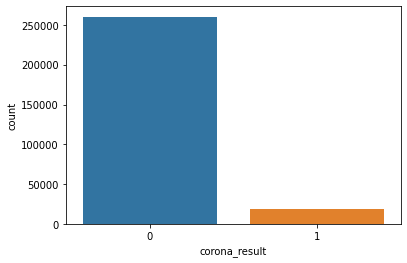

In [20]:
import seaborn as sns
sns.countplot(x="corona_result", data = data)

In [21]:
data = data.replace({'shortness_of_breath': {'None': 1,'1':1,'0':0}})

<AxesSubplot:xlabel='shortness_of_breath', ylabel='count'>

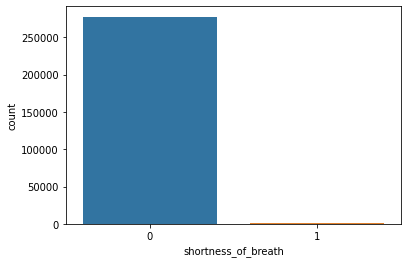

In [22]:
import seaborn as sns
sns.countplot(x="shortness_of_breath", data = data)

In [23]:
data = data.replace({'head_ache': {'None': 1,'1':1,'0':0}})

<AxesSubplot:xlabel='head_ache', ylabel='count'>

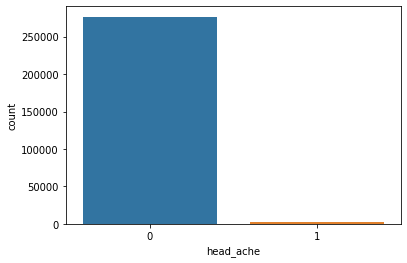

In [25]:
import seaborn as sns
sns.countplot(x="head_ache", data = data)

In [27]:
data = data.replace({'gender': {'None': 2,'female':0,'male':1}})

<AxesSubplot:xlabel='gender', ylabel='count'>

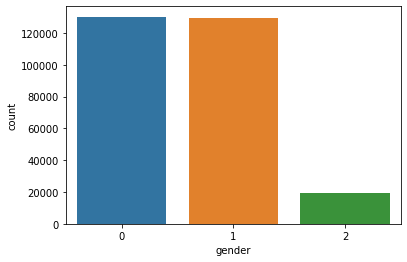

In [28]:
import seaborn as sns
sns.countplot(x="gender", data = data)

In [30]:
data = data.reindex(columns=['test_date','cough','fever','sore_throat','shortness_of_breath','head_ache','gender','corona_result'])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  int64 
 2   fever                278848 non-null  int64 
 3   sore_throat          278848 non-null  int64 
 4   shortness_of_breath  278848 non-null  int64 
 5   head_ache            278848 non-null  int64 
 6   gender               278848 non-null  int64 
 7   corona_result        278848 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 17.0+ MB


In [55]:
data.to_csv('data_processed.csv')

In [32]:
print(data.shape)

(278848, 8)


# Feature Selection

In [33]:
X = data.iloc[:, 1:7]
y = data.iloc[:,7]

# Oversampling with SMOTE

In [75]:
import seaborn as sns
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)

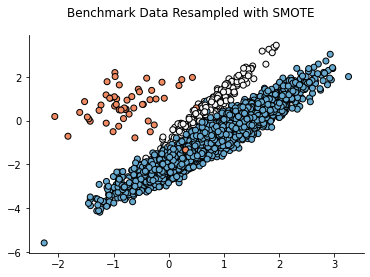

In [76]:
import matplotlib.pyplot as plt
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
pass

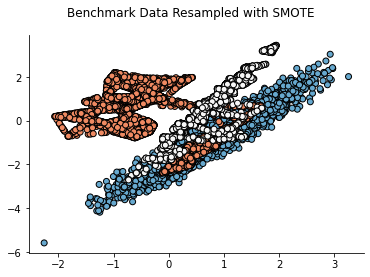

In [77]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_sample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
pass

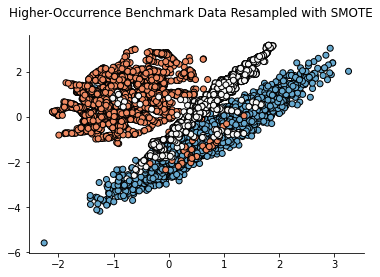

In [78]:
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.10, 0.10, 0.80],
                           class_sep=0.8, random_state=0)
X_resampled, y_resampled = SMOTE().fit_sample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Higher-Occurrence Benchmark Data Resampled with SMOTE")
pass

# Oversampling with ADASYN

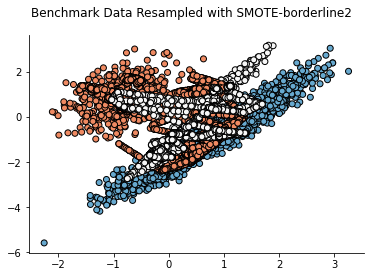

In [79]:
from imblearn.over_sampling import ADASYN

X_resampled, y_resampled = ADASYN().fit_sample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE-borderline2")
pass

# Data Splitting & Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=1)

# Machine Learning

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Linear Discriminant Analysis

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
predictions = LDA.predict(X_test)
print("*Confusion Matrix for LDA: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for LDA: 
[[563  83 321]
 [ 97 713 199]
 [ 10 182 826]]


In [47]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val1 = accuracy_score(y_test, predictions) *100
print(val1)
from sklearn import metrics
LDA_sensitivity = ((TP / float(FN + TP)))* 100

print(LDA_sensitivity)
LDA_specificity = ((TN / (TN + FP))) * 100

print(LDA_specificity)

0.5563186813186813
70.20708082832331
44.122257053291534
46.111111111111114


# Quadratic Discriminant Analysis

In [52]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QLDA = QuadraticDiscriminantAnalysis()
QLDA.fit(X_train, y_train)
predictions = QLDA.predict(X_test)
print("*Confusion Matrix for QLDA: ")
print(confusion_matrix(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val2 = accuracy_score(y_test, predictions) *100
print(val2)
from sklearn import metrics
QLDA_sensitivity = ((TP / float(FN + TP)))* 100

print(QLDA_sensitivity)
QLDA_specificity = ((TN / (TN + FP))) * 100

print(QLDA_specificity)

*Confusion Matrix for QLDA: 
[[444 183 340]
 [ 79 662 268]
 [  6  75 937]]
0.5416666666666666
68.23647294589178
40.14466546112116
69.8473282442748


# Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val3 = accuracy_score(y_test, predictions) *100
print(val3)
from sklearn import metrics
RF_sensitivity = ((TP / float(FN + TP)))* 100

print(RF_sensitivity)
RF_specificity = ((TN / (TN + FP))) * 100

print(RF_specificity)

*Confusion Matrix for RF: 
[[848  36  83]
 [ 37 912  60]
 [ 89  91 838]]
0.5177304964539007
86.77354709418837
48.18181818181818
49.31506849315068


# Decision Tree Classifier

In [73]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val4 = accuracy_score(y_test, predictions) *100
print(val1)
from sklearn import metrics
DT_sensitivity = ((TP / float(FN + TP)))* 100

print(DT_sensitivity)
DT_specificity = ((TN / (TN + FP))) * 100

print(DT_specificity)

*Confusion Matrix for DT: 
[[831  51  85]
 [ 32 896  81]
 [118  89 811]]
0.512707182320442
68.23647294589178
48.11812391430226
61.44578313253012


# Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
GB.fit(X_train, y_train)
predictions = GB.predict(X_test)
print("*Confusion Matrix for GB: ")
print(confusion_matrix(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val5 = accuracy_score(y_test, predictions) *100
print(val5)
from sklearn import metrics
GB_sensitivity = ((TP / float(FN + TP)))* 100

print(GB_sensitivity)
GB_specificity = ((TN / (TN + FP))) * 100

print(GB_specificity)

*Confusion Matrix for GB: 
[[660 145 162]
 [204 722  83]
 [ 84 168 766]]
0.534950895436164
71.7434869739479
47.756874095513744
41.54727793696275


# Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
predictions = GNB.predict(X_test)
print("*Confusion Matrix for GNB: ")
print(confusion_matrix(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val6 = accuracy_score(y_test, predictions) *100
print(val6)
from sklearn import metrics
GNB_sensitivity = ((TP / float(FN + TP)))* 100

print(GNB_sensitivity)
GNB_specificity = ((TN / (TN + FP))) * 100

print(GNB_specificity)

*Confusion Matrix for GNB: 
[[461 283 223]
 [182 651 176]
 [104 282 632]]
0.5282181357006975
58.249832999332
41.456834532374096
60.86021505376345


# KNeighbors Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val7 = accuracy_score(y_test, predictions) *100
print(val7)
from sklearn import metrics
KNN_sensitivity = ((TP / float(FN + TP)))* 100

print(KNN_sensitivity)
KNN_specificity = ((TN / (TN + FP))) * 100

print(KNN_specificity)

*Confusion Matrix for KNN: 
[[875  34  58]
 [ 44 918  47]
 [128  98 792]]
0.5141635489043292
86.33934535738142
48.80089235917457
43.58974358974359


# XGB Classifier

In [60]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
predictions = XGB.predict(X_test)
print("*Confusion Matrix for XGB: ")
print(confusion_matrix(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val8 = accuracy_score(y_test, predictions) *100
print(val8)
from sklearn import metrics
XGB_sensitivity = ((TP / float(FN + TP)))* 100

print(XGB_sensitivity)
XGB_specificity = ((TN / (TN + FP))) * 100

print(XGB_specificity)

*Confusion Matrix for XGB: 
[[805  53 109]
 [ 41 899  69]
 [ 83 101 834]]
0.5228031145717463
84.76953907815631
47.24178403755869
56.38297872340425


# Support Vector Machine

In [62]:
from sklearn.svm import SVC
SVM = SVC(gamma='auto')
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val9 = accuracy_score(y_test, predictions) *100
print(val9)
from sklearn import metrics
SVM_sensitivity = ((TP / float(FN + TP)))* 100

print(SVM_sensitivity)
SVM_specificity = ((TN / (TN + FP))) * 100

print(SVM_specificity)

*Confusion Matrix for SVM: 
[[695  71 201]
 [ 92 683 234]
 [ 61  74 883]]
0.5029201817001947
75.51770207080828
50.43541364296081
43.558282208588956


# Voting Classifier

In [63]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = SVC(gamma='auto')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for Voting Classifier: 
[[837  39  91]
 [ 44 894  71]
 [ 80  79 859]]


In [64]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val10 = accuracy_score(y_test, predictions) * 100
print(val10)
from sklearn import metrics
VOT_sensitivity = ((TP / float(FN + TP))) * 100

print(VOT_sensitivity)
VOT_specificity = ((TN / (TN + FP))) * 100

print(VOT_specificity)

0.5170893054024256
86.5063460253841
48.353552859618716
46.98795180722892


# Accuracy Comparsion

# 'Accuracy', 'Sensitvity', 'Specificity'

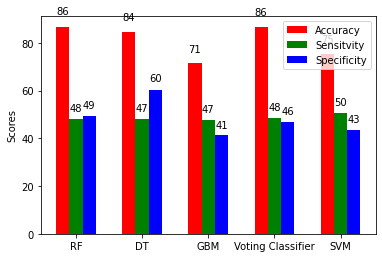

In [67]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [val3,val4,val5,val10,val9]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [RF_sensitivity,DT_sensitivity,GB_sensitivity,VOT_sensitivity,SVM_sensitivity]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [RF_specificity,DT_specificity,GB_specificity,VOT_specificity,SVM_specificity]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('RF','DT','GBM','Voting Classifier','SVM') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Accuracy', 'Sensitvity', 'Specificity') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

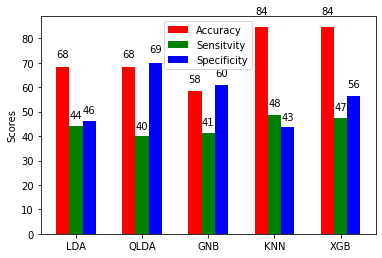

In [69]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [val1,val2,val6,val7,val8]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [LDA_sensitivity,QLDA_sensitivity,GNB_sensitivity,KNN_sensitivity,XGB_sensitivity]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [LDA_specificity,QLDA_specificity,GNB_specificity,KNN_specificity,XGB_specificity]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('LDA','QLDA','GNB','KNN','XGB') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Accuracy', 'Sensitvity', 'Specificity') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

# Accuracy

In [70]:
score = [val1,val2,val3,val4,val5,val6,val7,val8,val9,val10]

In [71]:
#make variabel for save the result and to show it
classifier = ('LDA','QLDA','Random Forest','Decision Tree','Gradiant Boosting','Naive bayes','KN Neighbours','XGBoost Classifer','Support Vector Machine','Voting Classifier')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6 7 8 9]
[68.23647294589178, 68.23647294589178, 86.77354709418837, 84.43553774215097, 71.7434869739479, 58.249832999332, 84.76953907815631, 84.76953907815631, 75.51770207080828, 86.5063460253841]


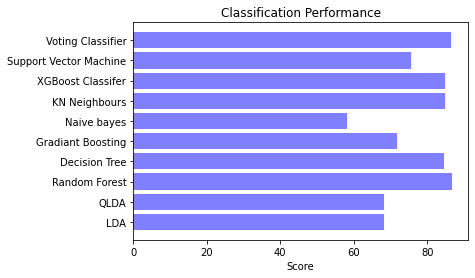

In [72]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

Note; From the above accuracy comparsion we can see that Random Forest and Voting Classifer gives better accuracy compares to others